<a href="https://colab.research.google.com/github/Sona30k/ML/blob/main/Copy_of_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random
N = 10000 #total number of user seeing ads
d=10  # number of different ads
ads_selected=[] # List to store the selected ads in each round
wins=[0]*d # Number of times each ad got a reward (success)
losses=[0]*d # Number of times each ad didn’t get a reward
total_reward=0
for n in range(0,N):
  ad= 0 # Store the selected ad index
  max_random=0 # Store the highest beta sample value
  for i in range(0,d):  # Loop through all 10 ads
    random_beta=random.betavariate(wins[i]+1, losses[i]+1)
    if random_beta>max_random:
      max_random=random_beta
      ad=i # Select the ad with the highest sampled probability
    ads_selected.append(ad)

    reward=dataset.values[n,ad] # Get reward (0 or 1) from dataset
    if reward==1:
      wins[ad]=wins[ad]+1 # Increase success count
    else:
      losses[ad]=losses[ad]+1  # Increase failure count
    total_reward=total_reward+reward

## Visualising the results - Histogram

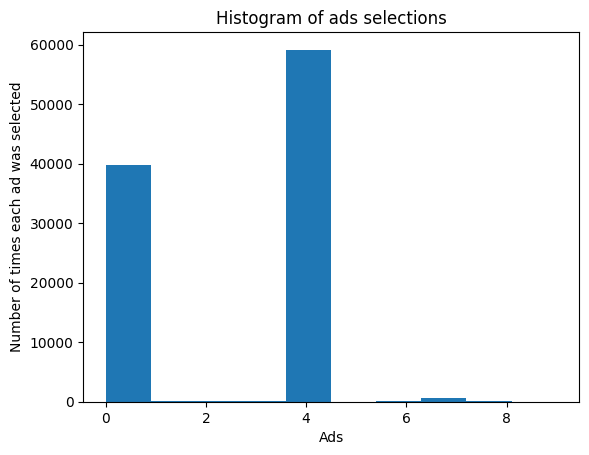

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()